# Twitter Challenge 1


## Recall that you were asked to retrieve ~ 10K tweets last week.

## Do the following:

1. Use any Python package(s) of your choice
2. Perform text pre-processing
3. Generate a word cloud
4. Post the word cloud (image) as a Tweet (using your own Twitter account).

### Briefly describe: what is the topic? what is the data period?

- The tweets that I have actually retrieve are #SMArigged. SMA stands for the Seoul Music Awards, a major South Korean music awards show presented by the newspaper Sports Seoul. The award winners are selected based on a combination of criteria, including music sales, popular votes, and expert judges' opinions. The data period for collection was 24th January to 30th January. At a certain point the hashtag #SMArigged was trending in Singapore and when I skimmed through, there was alot of controvery with regards to fans questioning the judgement criteria when presenting awards.
### Include #is434 #smu #scis hashtags in your tweet.

In [3]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv('#SMArigged.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9127 entries, 0 to 9126
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  9127 non-null   object 
 1   Tweet Id  9127 non-null   float64
 2   Text      9127 non-null   object 
 3   Username  9127 non-null   object 
dtypes: float64(1), object(3)
memory usage: 285.3+ KB
None


,Datetime,Tweet Id,Text,Username
0,2022-01-24 06:56:31+00:00,1.490000e+18,SMA MAKES MAMA LOOK SO GOOD #SMArigged #SMA_Re...,mynyeongie
1,2022-01-24 06:56:07+00:00,1.490000e+18,Yall in #SMArigged can keep crying without dra...,dollsxngie
2,2022-01-24 06:50:55+00:00,1.490000e+18,#SMArigged https://t.co/RfhfvRZ4Ml,rayanamalik2
3,2022-01-24 06:45:27+00:00,1.490000e+18,"En- deserves that 2 awards, but txt too. Those...",lilac_gum
4,2022-01-24 06:39:40+00:00,1.490000e+18,#SMArigged https://t.co/GW0erukELd,aratazaki


In [7]:
import re 

def preprocess(text):
    remove_punctuations = ''.join([word for word in text if word not in string.punctuation and word not in ['“', '”', '’', '‘']])
    lowercase = remove_punctuations.lower()
    tokenized = word_tokenize(lowercase)
    stopwords_removed = [word for word in tokenized if word not in STOPWORDS]
    lemmatized = [WordNetLemmatizer().lemmatize(word) for word in stopwords_removed]
    preprocessed_text = " ".join(lemmatized)
#     text = re.sub("smarigged", "", text)
    return preprocessed_text

# Apply function to text column and create new column for use later with wordclouds
data['cleaned_Text'] = data['Text'].apply(preprocess)

In [8]:
data.head()

,Datetime,Tweet Id,Text,Username,cleaned_Text
0,2022-01-24 06:56:31+00:00,1.490000e+18,SMA MAKES MAMA LOOK SO GOOD #SMArigged #SMA_Re...,mynyeongie,sma make mama look good smarigged smarespective
1,2022-01-24 06:56:07+00:00,1.490000e+18,Yall in #SMArigged can keep crying without dra...,dollsxngie,yall smarigged keep cry without dragging atz p...
2,2022-01-24 06:50:55+00:00,1.490000e+18,#SMArigged https://t.co/RfhfvRZ4Ml,rayanamalik2,smarigged httpstcorfhfvrz4ml
3,2022-01-24 06:45:27+00:00,1.490000e+18,"En- deserves that 2 awards, but txt too. Those...",lilac_gum,en deserves 2 award txt say dirty thing idol t...
4,2022-01-24 06:39:40+00:00,1.490000e+18,#SMArigged https://t.co/GW0erukELd,aratazaki,smarigged httpstcogw0erukeld


# Round 1 Cleaning

In [15]:
import re 
import string
import nltk
import numpy as np
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
    ) 
    text = text.lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(EMOJI_PATTERN, '', text)
    text = re.sub('([^\x00-\x7F])+','',text)
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_clean = pd.DataFrame(data['Text'].apply(clean_text_round1))
df_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text
0,sma makes mama look good
1,yall keep crying without dragging atz proof lm...
2,
3,en deserves awards txt say dirty things idols ...
4,


In [17]:
import numpy as np
df_clean['Text'].replace('', np.nan, inplace = True)
df_clean.head()

,Text
0,sma makes mama look good
1,yall keep crying without dragging atz proof lm...
2,NaN
3,en deserves awards txt say dirty things idols ...
4,NaN


In [19]:
df_clean.dropna(subset = ['Text'], inplace = True)

In [20]:
df_clean.shape

(6742, 1)

# Round 2

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
def clean_text_round2(text):
    return ' '.join([word for word in text.split() if word not in (stop)])

In [21]:
df_clean = pd.DataFrame(df_clean['Text'].apply(clean_text_round2))
df_clean.head()

,Text
0,sma makes mama look good
1,yall keep crying without dragging atz proof lm...
3,en deserves awards txt say dirty things idols ...
5,meant say voting app rigged like hell spent wh...
6,cant forgive stripping txt award


# Round 3

In [22]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()

def clean_text_round3_lemmatize(text):
    
    tokenization = nltk.word_tokenize(text)
    lemmtized_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in tokenization])
    return lemmtized_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Darren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Darren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
df_clean = pd.DataFrame(df_clean['Text'].apply(clean_text_round3_lemmatize))
df_clean.tail()

,Text
9120,hi buddy go appstore google store leave one st...
9123,httpstcoihltdnswbx httpstconaqhuyoneb
9124,bahkan yg gk punya nilai digital tinggi aja bi...
9125,olo fukkkkk sma want refund money fair izone
9126,httpstcooorzpchotm


# WordCloud Generation

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [25]:
text_joined = " ".join(one_row for one_row in df_clean['Text'])

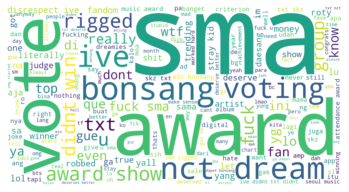

In [26]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1500, height=800).generate(text_joined)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()